# 1. Hello world Agent

In [7]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph

In [8]:
# Build agent state
class AgentState(TypedDict): #our state schema
    message : str

In [13]:
# Define node, we pass input and output in node, and its type must be state
# We also add doc string, it tells AI agent what actually this function does
def greeting_node(state: AgentState) -> AgentState:
    """Simple node that adds a greeting message to the state"""
    state['message'] = "Hey "+ state["message"] + ", how is your day going?"
    return state
    

In [14]:
#Build graph
graph = StateGraph(AgentState)

graph.add_node("greeter", greeting_node) # it take two parameters, 1. name of node, 2. what action it perform

graph.set_entry_point("greeter") #one parameter that is key

graph.set_finish_point("greeter")

app = graph.compile()


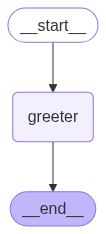

In [15]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [17]:
result = app.invoke({"message": "Ali"})

In [18]:
result["message"]

'Hey Ali, how is your day going?'

## Exercise

In [19]:
# Input {"name": "Alli"}
# Output {"Ali, you're doing an amazing job learning LangGraph!"

In [21]:
class MyAgentState(TypedDict):
    name: str

In [22]:
def greeting_name_node(state: MyAgentState) -> MyAgentState:
    """Simple node that add a greeting message to the state"""
    state['name'] = state['name'] + ", you're doing an amazing job learning LangGraph!"
    return state

In [27]:
graph = StateGraph(MyAgentState)
graph.add_node("Name Greeter", greeting_name_node)
graph.set_entry_point("Name Greeter")
graph.set_finish_point("Name Greeter")
app = graph.compile()

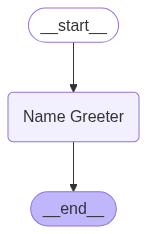

In [28]:
display(Image(app.get_graph().draw_mermaid_png()))

In [29]:
result = app.invoke({"name": "Ali"})

In [30]:
print(result["name"])

Ali, you're doing an amazing job learning LangGraph!


# 2. Agent - Multiple Inputs Graph

In [17]:
from typing import TypedDict, List
from langgraph.graph import StateGraph

In [18]:
class AgentState(TypedDict):
    values: List[int]
    name: str
    result: str

In [26]:
def process_values(state: AgentState) -> AgentState:
    """This function handles multiples different inputs"""
    print("state")

    state["result"] = f"Hi there {state["name"]}! Your sum = {sum(state["values"])}"
    print("state")
    return state

In [27]:
graph = StateGraph(AgentState)
graph.add_node("processor", process_values)
graph.set_entry_point("processor") # Set the starting node
graph.set_finish_point("processor") # Set the ending node

app = graph.compile() # Compiling the graph

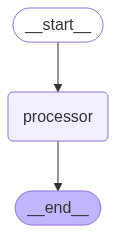

In [28]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [29]:
answers = app.invoke({"values": [1,2,3,4], "name": "Ali"})

state
state


In [30]:
print(answers)

{'values': [1, 2, 3, 4], 'name': 'Ali', 'result': 'Hi there Ali! Your sum = 10'}


In [31]:
print(answers["result"])

Hi there Ali! Your sum = 10


# Exercie 2

In [85]:
import math
from typing import TypedDict, List
from langgraph.graph import StateGraph

In [86]:
class MyAgentState(TypedDict):
    values: List[int]
    name: str
    operation: str
    result: str

In [97]:
def calculate_values(state: AgentState) -> AgentState:
    """This function handles multiples different inputs and perform calculation"""
    if state["operation"] == "*":
        state["result"] = f"Hi {state['name']}, your answer is: {math.prod(state['values'])}"
    elif state["operation"] == "+":
        state["result"] = f"Hi {state['name']}, your answer is: {sum(state['values'])}"
    else:
        raise ValueError("❌ Invalid operator! only '+' and '*' are allowed.")
        
    return state

In [98]:
graph = StateGraph(MyAgentState)
graph.add_node("calculator", calculate_values)
graph.set_entry_point("calculator")
graph.set_finish_point("calculator")

app = graph.compile()

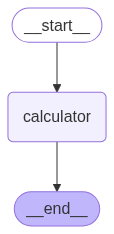

In [99]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [101]:
final_result = app.invoke({"values":[1,2,3,4], "name": "Ali", "operation": "+"}) 
print(final_result)

{'values': [1, 2, 3, 4], 'name': 'Ali', 'operation': '+', 'result': 'Hi Ali, your answer is: 10'}


In [103]:
final_result = app.invoke({"values":[1,2,3,4], "name": "Ali", "operation": "*"}) 
print(final_result["result"])

Hi Ali, your answer is: 24
